In [12]:
import numpy as np

In [13]:
NR = 256
WW = 4

In [14]:
count = lambda k: (WW + k-1) * NR / (2**k)

In [15]:
sum([count(k) for k in range(1,1+int(np.log2(NR)))])

1267.0

In [18]:
def rowcount(lognr: int, ww: int, row: int) -> int:
    assert row >= 1
    return (ww + row-1) * (2**(lognr-row))

In [23]:
sum([rowcount(8,4,k) for k in range(1,1+int(np.log2(NR)))])

1267

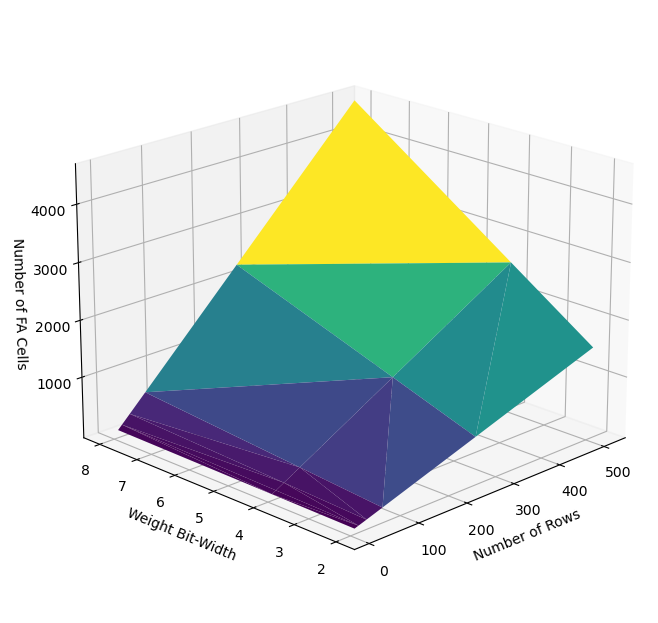

In [59]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Dataset
data = [[], [], [], []]
for nr in [8, 16, 32, 64, 256, 512]:
    lognr = int(np.log2(nr))
    for ww in [2, 4, 8]:
        count = sum([rowcount(lognr, ww,k) for k in range(1,1+lognr)])
        data[0].append(nr)
        data[1].append(ww)
        data[2].append(count)
        data[3].append(nr*ww)
        
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(data[0], data[1], data[2], cmap=plt.cm.viridis, linewidth=0.2) #c='skyblue', s=60)
ax.set_xlabel("Number of Rows")
ax.set_ylabel("Weight Bit-Width")
ax.set_zlabel("Number of FA Cells")
ax.view_init(20,-135)

plt.show()

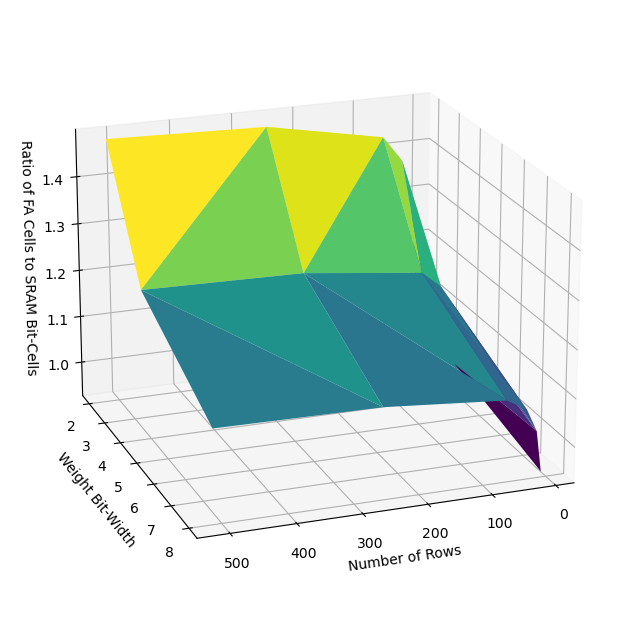

In [94]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(data[0], data[1], np.array(data[2])/np.array(data[3]), cmap=plt.cm.viridis, linewidth=0.2) #c='skyblue', s=60)
ax.set_xlabel("Number of Rows")
ax.set_ylabel("Weight Bit-Width")
ax.set_zlabel("Ratio of FA Cells to SRAM Bit-Cells")
ax.view_init(20,70)

plt.show()

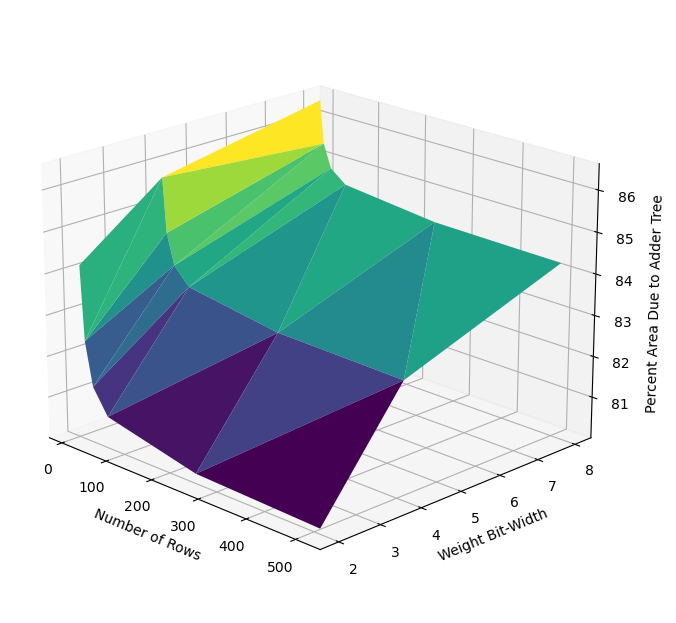

In [96]:
# Calcuate the proportion of area that is in adders, for each of these
cell_area_ratio = 6.0
n_srambits = np.array(data[2])
n_fas = np.array(data[3])
area_ratios = 100.0 * (cell_area_ratio * n_fas) / (cell_area_ratio * n_fas + n_srambits)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(data[0], data[1], area_ratios, cmap=plt.cm.viridis, linewidth=0.2) #c='skyblue', s=60)
ax.set_xlabel("Number of Rows")
ax.set_ylabel("Weight Bit-Width")
ax.set_zlabel("Percent Area Due to Adder Tree")
ax.view_init(20,-45)

plt.show()